<a href="https://www.kaggle.com/code/ramsesmdlc/house-prices-regression?scriptVersionId=137210177" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [46]:
#Import Libraries

import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

from pandas.plotting import scatter_matrix

from sklearn.impute import SimpleImputer # completing/replacing missing values
from sklearn.preprocessing import StandardScaler # Machine Learning (Scaling data) - Z-Score Normalization)
from sklearn.preprocessing import OneHotEncoder # Machine Learning (One Hot Encoder Categorical Attributes)
from sklearn.pipeline import Pipeline # Machine Learning (Pipeline class for numerical features)
from sklearn.compose import ColumnTransformer # Machine Learning (Transformation of: numerical features + categorical attributes)

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

<div class="alert alert-block alert-warning"><b>Point 0, 1:</b> In following steps we are going to apply several tehcniques, methods or procedures to check and assess the training dataset. Furthermore, in these stages we are not going to modify or edit the training dataset.</div>

# __0. Important__

Type of machine learning system to build:

1. Supervised Learning: __Linear Regression (Gradient Descent)__
2. Batch Learning (also called "offline learning")
3. Model-based learning

Goal:
1. __Predict the "sales price" for each house__

# __1. Loading the Data - Training Dataset__

In [14]:
training_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

# __2. Quick Exploratory Data Analysis (QEDA) - Training Dataset (Independent Features - Metric Variables)__

There are a lot of variables of different types (object, int64, and float64) in the training set (80 to be precise). Therefore, conducting an exhaustive exploratory data analysis (EDA) of all features may not be worthwhile. 

> Non-metric variable = attributes, characteristics or categorical properties = type "object"

> Metric variables = quantitavive data = type "int64" and/or type "float64".

The best approach would be to quickly identify the independent features (metric variables, to be precise) that have a strong "Correlation Coefficient" (to be specific "Pearson" and/or "Spearman") with the dependent feature "SalePrice" and use them to develop the model. 

1. Pearson correlation coefficient:

> It is computed using "raw data" values.

> Assumption N°1: Data from both variables follow normal distributions.

> Assumption N°2: Data have no outliers.

> Assumption N°3: Data is from a random or representative sample.

> Assumption N°4: Expect a "linear" relationship between the two variables.

2. Spearman correlation coefficient: 

> It is used when data fail to meet the assumptions of "Pearson correlation coefficient".

> It is computed from the "ranks" (e.g., from lowest to highest) of the data. For instance, if we have a set of data X1 = [400 100 300 200 10], then this set of data could be ranked as X1_Ranked = [5 2 4 3 1]; or a set of data X2 = [10 20 30 40 50], then this set of data could be ranked as X2_Ranked = [1 2 3 4 5]

> It measures the "monotonicity of relationships" (which are less restrictive than linear relationships) between a pair of variables. Each variable changes in only one direction but not necessarily at the same rate. 

> > Positive monotonic: when one variable increases, the other also increases (it does not have to be linear).

> > Negative monotonic: when one variable increases, the other decreases. (it does not have to be linear).

In [51]:
def QEDA(training_data):  
  # Print the "shape" of the dataframe
  print("\n" +'\033[1m','\033[94m',"Shape of the dataframe:",'\033[0m', training_data.shape, "\n")
  
  # Print the "general information" of the dataframe
  print("\n", '\033[1m','\033[94m',"Information of the dataframe:",'\033[0m', "\n")
  training_data.info()
    
  #"Standard Correlation Coefficient (also called, "Pearson's Correlation Coefficient") of the metric variables" of the dataframe
      #The code "select_dtypes" allow us to choose data points of the dataframe with specific datatypes.
          #In this case we are interested in datatypes of "int64" and "float64"
      #The output will be a "Series"  
  matrix_selection = training_data.select_dtypes(include=['int64',"float64"]) 
  corr_Pearson_matrix1 = matrix_selection.corr()
  corr_Pearson_serie = corr_Pearson_matrix1["SalePrice"].sort_values(ascending=False)
  
  #"Spearman's Rank Correlation Coefficient of the metric variables" of the dataframe
      #The output will be a "Series"  
  matrix_selection = training_data.select_dtypes(include=['int64',"float64"]) 
  corr_Spearman_matrix1 = matrix_selection.corr(method="spearman")
  corr_Spearman_serie = corr_Spearman_matrix1["SalePrice"].sort_values(ascending=False)

  # Print the dataframe to contrast the "Pearson's Correlation Coefficient" vs "Spearman's Rank Correlation Coefficient on metric variables"
    #Transforming the Serie to a Dataframe
    #Reseting the index of he dataframe 
    #Changing the head of the dataframe
  corr_Pearson_df = pd.DataFrame(corr_Pearson_serie)
  corr_Spearman_df = pd.DataFrame(corr_Spearman_serie)

  corr_Pearson_df.reset_index(inplace=True)
  corr_Spearman_df.reset_index(inplace=True)

  corr_Pearson_df = corr_Pearson_df.rename(columns = {"index":"Metric Variable","SalePrice":"Pearson Correlation"})
  corr_Spearman_df = corr_Spearman_df.rename(columns = {"index":"Metric Variable","SalePrice":"Spearman Correlation"})

  print("\n" +'\033[1m','\033[94m', "Pearson vs Spearman Correlation Coefficient", '\033[0m' + "\n")
  corr_compare_df = pd.concat([corr_Pearson_df, corr_Spearman_df], axis=1)
  print(corr_compare_df.head(13))

# Call the function
QEDA(training_data)


  Shape of the dataframe:  (1460, 81) 


   Information of the dataframe:  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     146

## __2.1. Conclusions__

__The assessment of the previous outputs allows us to describe the following__:

1. Considering that out of the top 13 metric variables (i.e., metric variables with a "Correlation Coefficient" > 0.50), have a "Spearman Correlation Coefficient" stronger than "Pearson Correlation Coefficient", we can develop a "a non-linear model" without significant issues. 

2. Therefore we are going to develop the EDA of the top 13 metric variables (according to the "Spearman Correlation Coefficient"). 

> 12 independent variables

> 1 dependent variable (SalePrice)

# __3. Exploratory Data Analysis (EDA) - Training Dataset (some Independent Features - Metric Variables)__

In [16]:
#Defining the training dataset to be use for fo the EDA
    #This definition is based on the results of section "2. Quick Exploratory Data Analysis (QEDA) - Training Dataset (Independent Features - Metric Variables)"
    #To be specific we choose only the columns (13 columns to be precise) with metric variables and Spearman Correlation Coefficient" > 0.50
matrix_selection = training_data.select_dtypes(include=['int64',"float64"]) 
training_dataX = matrix_selection[["SalePrice","OverallQual", "GrLivArea", "GarageCars","GarageArea", "TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd","GarageYrBlt","Fireplaces"]]


  Shape of the dataframe:  (1460, 13) 

  Head of the dataframe:  

   SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0     208500            7       1710           2         548          856   
1     181500            6       1262           2         460         1262   
2     223500            7       1786           2         608          920   
3     140000            7       1717           3         642          756   
4     250000            8       2198           3         836         1145   

   1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  \
0       856         2             8       2003          2003       2003.0   
1      1262         2             6       1976          1976       1976.0   
2       920         2             6       2001          2002       2001.0   
3       961         1             7       1915          1970       1998.0   
4      1145         2             9       2000          2000       2000.0   

   Fi

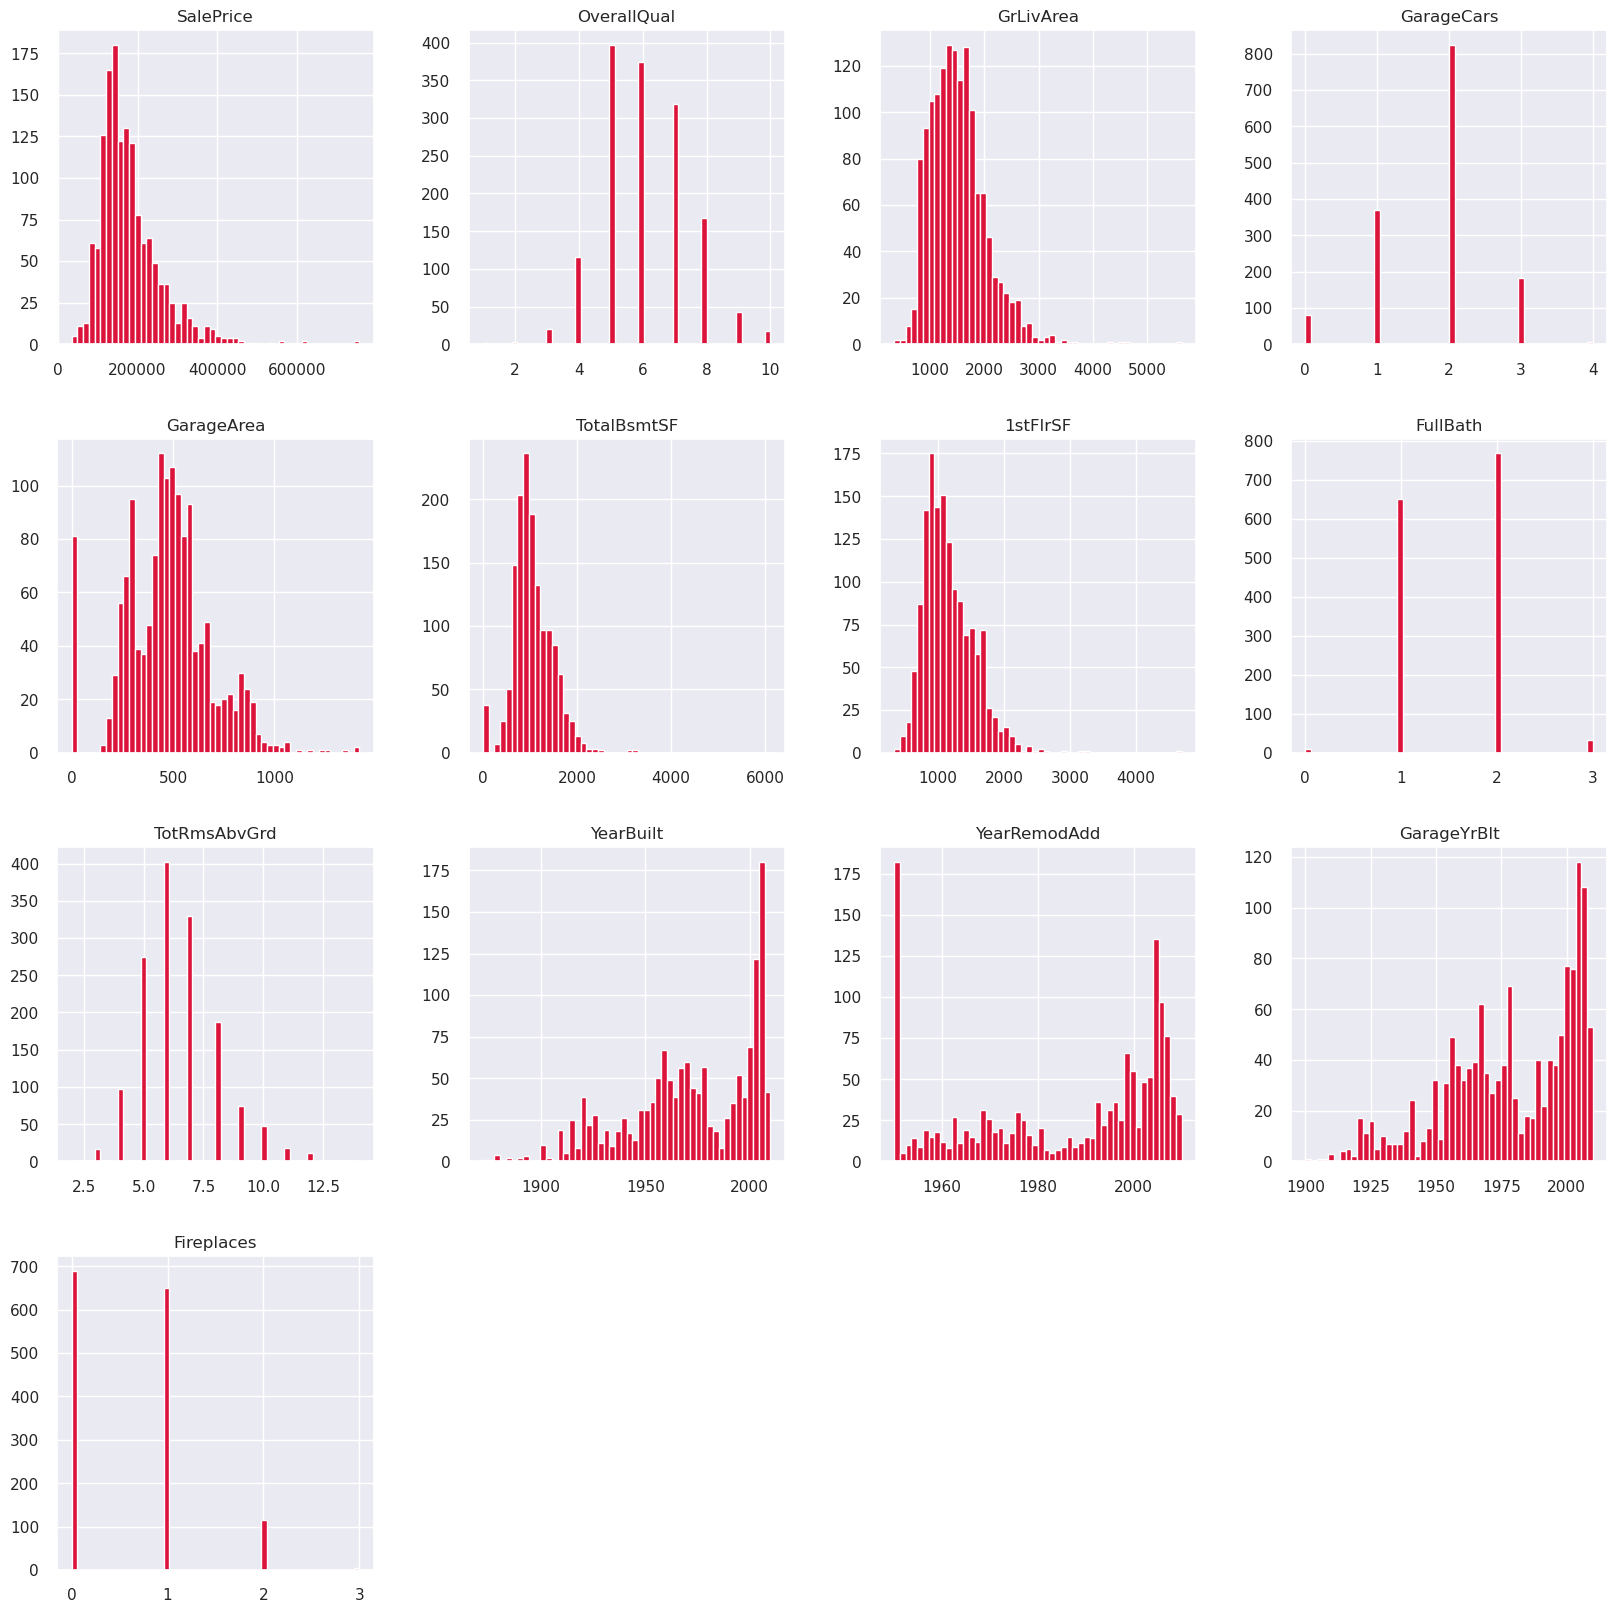


  Boxplots of some metric variables of the dataframe: 



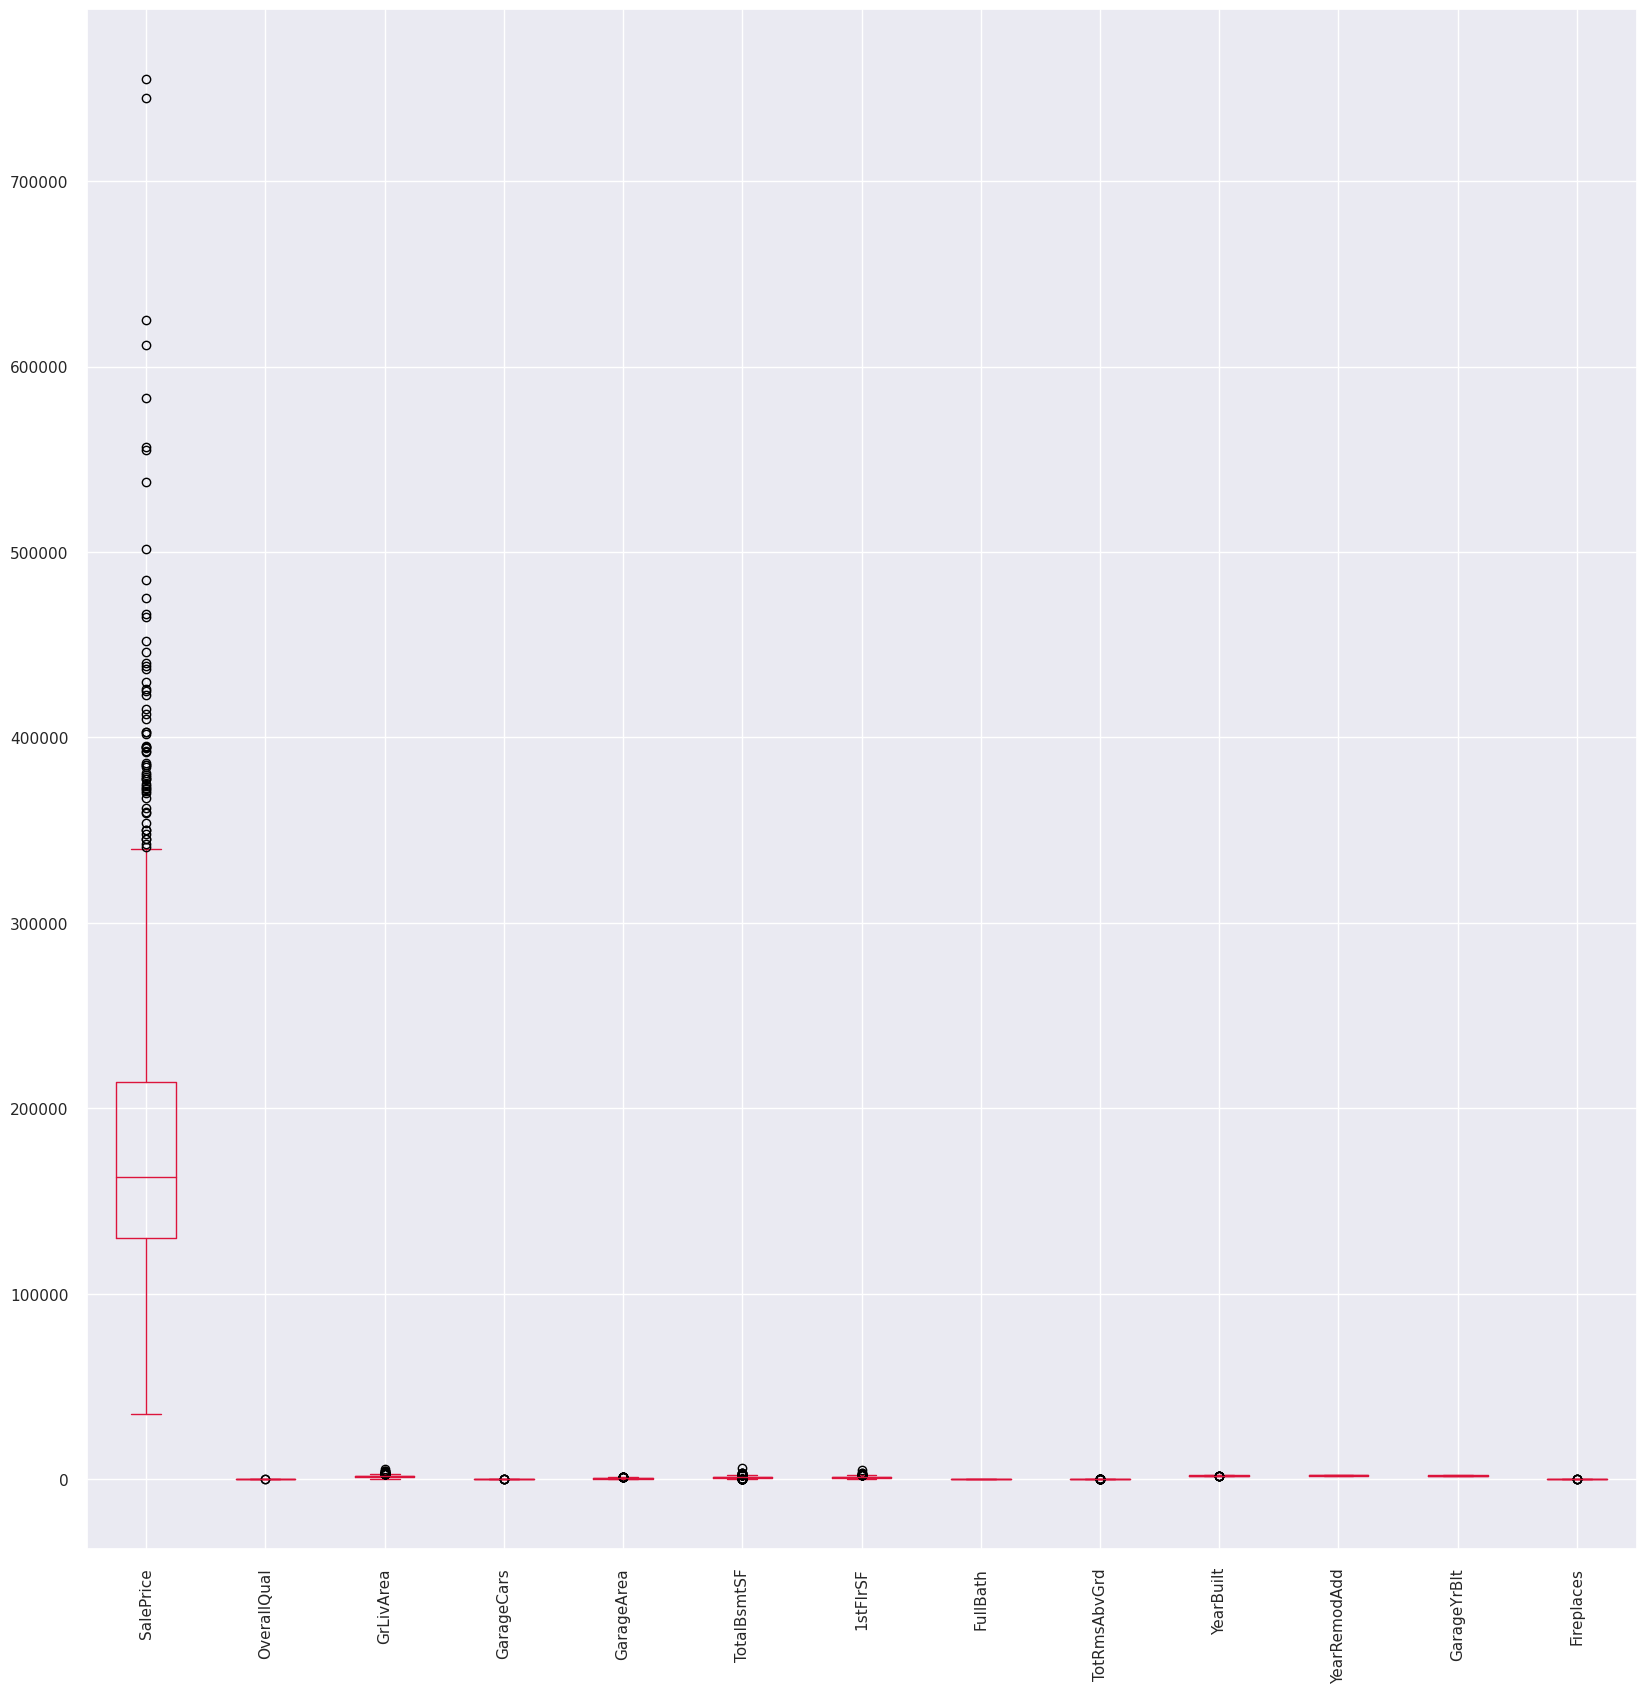


  Spearman Correlation Coefficient of some metric variables of the dataframe: 

              SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  \
SalePrice      1.000000     0.809829   0.731310    0.690711    0.649379   
OverallQual    0.809829     1.000000   0.603262    0.608756    0.541552   
GrLivArea      0.731310     0.603262   1.000000    0.505094    0.468211   
GarageCars     0.690711     0.608756   0.505094    1.000000    0.853317   
GarageArea     0.649379     0.541552   0.468211    0.853317    1.000000   
TotalBsmtSF    0.602725     0.459915   0.371026    0.455508    0.486685   
1stFlrSF       0.575408     0.408730   0.494421    0.450580    0.489797   
FullBath       0.635957     0.576372   0.658419    0.518310    0.444459   
TotRmsAbvGrd   0.532586     0.427806   0.827874    0.386244    0.330549   
YearBuilt      0.652682     0.647392   0.288493    0.601519    0.528281   
YearRemodAdd   0.571159     0.557723   0.282400    0.456245    0.398267   
GarageYrBlt    0.59

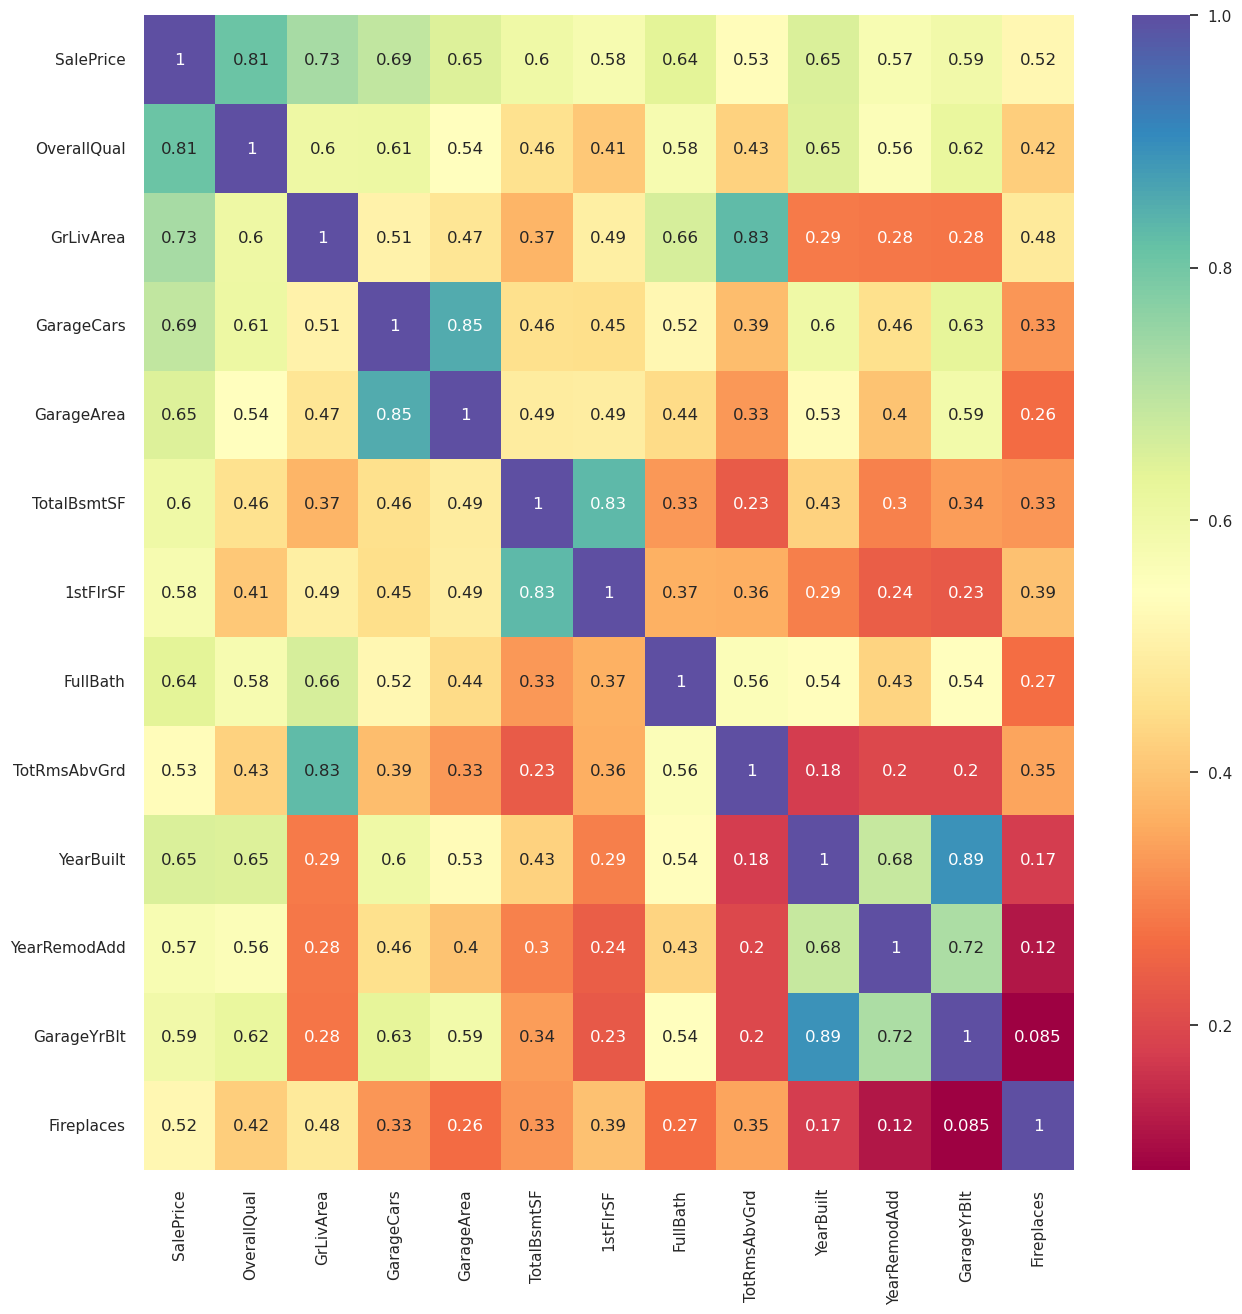

In [17]:
def EDA(training_dataX):  
  # Print the "shape" of the dataframe
  print("\n" +'\033[1m','\033[94m',"Shape of the dataframe:",'\033[0m', training_dataX.shape, "\n")
    
  # Print the "head" of the dataframe
  print('\033[1m','\033[94m',"Head of the dataframe:",'\033[0m', "\n")
  print(training_dataX.head())
  
  # Print the "general information" of the dataframe
  print("\n", '\033[1m','\033[94m',"Information of the dataframe:",'\033[0m', "\n")
  training_dataX.info()
 
  # Print the "number and percentage" of missing values per column" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m', "Number and percentage of missing values per column of some metric variables of the dataframe:", '\033[0m' + "\n")
  missing = training_dataX.isnull().sum()
  percent = missing / training_dataX.shape[0] * 100
  print(pd.concat([missing, percent], axis=1, keys=["Missing", "Percent"]))

  # Print the "summary statistics" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m', "Summary statistics of some metric variables of the dataframe:", '\033[0m' + "\n")
  print(training_dataX.describe())  
    
  # Plot "histograms" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m',"Histograms of some metric variables of the dataframe:", '\033[0m' + "\n")
  training_dataX.hist(bins= 50, figsize=(20,20),color= "Crimson")
  plt.show()  
    
  # Plot "boxplots" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m',"Boxplots of some metric variables of the dataframe:", '\033[0m' + "\n")
  training_dataX.boxplot(figsize=(20,20), rot=90, color= "Crimson")
  plt.show()
  
  # Print the "Spearman Correlation Coefficient" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m', "Spearman Correlation Coefficient of some metric variables of the dataframe:", '\033[0m' + "\n")
  print(training_dataX.corr(method="spearman"))    
    
  # Plot "heatmap" of the "Spearman Correlation Coefficient" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m', "Spearman Correlation matrix of some metric variables of the dataframe:", '\033[0m' + "\n")
  corr = training_dataX.corr(method="spearman")
  sns.set(rc={"figure.figsize":(15, 15)}) #width, height
  sns.heatmap(corr, annot = True, cmap="Spectral")
  plt.show()
    
# Call the function
EDA(training_dataX)

## __3.1. Conclusions__

__The assessment of the previous outputs allows us to describe the following__:

### __3.2. Collinearity check__

1. The "Spearman Correlation Coefficient" (table and graph) shows us several cases of "Collinearity" (i.e. when an "independent variable" is higly correlated with another "independent variable"; thereby, giving almost the same information both variables). Those cases are the followings: 

> Case N°1:"GaragaCars" vs "GarageArea" -"Pearson Correlation Coefficient" = 0.85 

> Case N°2:"TotalBsmtSF" vs "1stFlrSF" -"Pearson Correlation Coefficient" = 0.83 

> Case N°3:"TotRmsAbvGrd" vs "GrLivArea" -"Pearson Correlation Coefficient" = 0.83 

> Case N°4:"YearBuilt" vs "GarageYrBlt" -"Pearson Correlation Coefficient" = 0.89 

2. Based on the previous point, we only require one of the "independent variables" in each collinear case (i.e. we can keep the "independent variable" with the strongest correlation to the "dependent variable"). Those "independents variables" that we are going to keep are the followings

> Case N°1:"GaragaCars"

> Case N°2:"TotalBsmtSF"

> Case N°3:"GrLivArea" 

> Case N°4:"YearBuilt"

3. Based on the previous point, the other "independent variable" of every case will be dropped. Consequently, the linear model is going to use only 8 independet variables. These are the followings:

> OverallQual        

> GarageCars      

> TotalBsmtSF    

> FullBath      

> GrLivArea 

> YearBuilt     

> YearRemodAdd    
    
> Fireplaces 

4. The "Boxplots for the numerical columns", "Histograms for the numerical columns" and "Summary statistics of the numerical columns" show us that it will be necessary to apply "Feature Scaling" in some numerical attributes. 

> For instance, we can see that the mean values of features such as "GrLivArea" and "TotalBsmtSF" are much larger than the mean value of the feature "GaragaCars".

> The histograms of the features "YearBuilt" looks like tail-heavy.

# __4. Visualize the Data - Training Dataset (some Independent Features - Metric Variables)__

array([[<Axes: xlabel='SalePrice', ylabel='SalePrice'>,
        <Axes: xlabel='OverallQual', ylabel='SalePrice'>,
        <Axes: xlabel='GrLivArea', ylabel='SalePrice'>,
        <Axes: xlabel='GarageCars', ylabel='SalePrice'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <Axes: xlabel='FullBath', ylabel='SalePrice'>,
        <Axes: xlabel='YearBuilt', ylabel='SalePrice'>,
        <Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>,
        <Axes: xlabel='Fireplaces', ylabel='SalePrice'>],
       [<Axes: xlabel='SalePrice', ylabel='OverallQual'>,
        <Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='OverallQual'>,
        <Axes: xlabel='FullBath', ylabel='OverallQual'>,
        <Axes: xlabel='YearBuilt', ylabel='OverallQual'>,
        <Axes: xlabel='YearRemodAdd', ylabel='OverallQual'>,
        <Axes: x

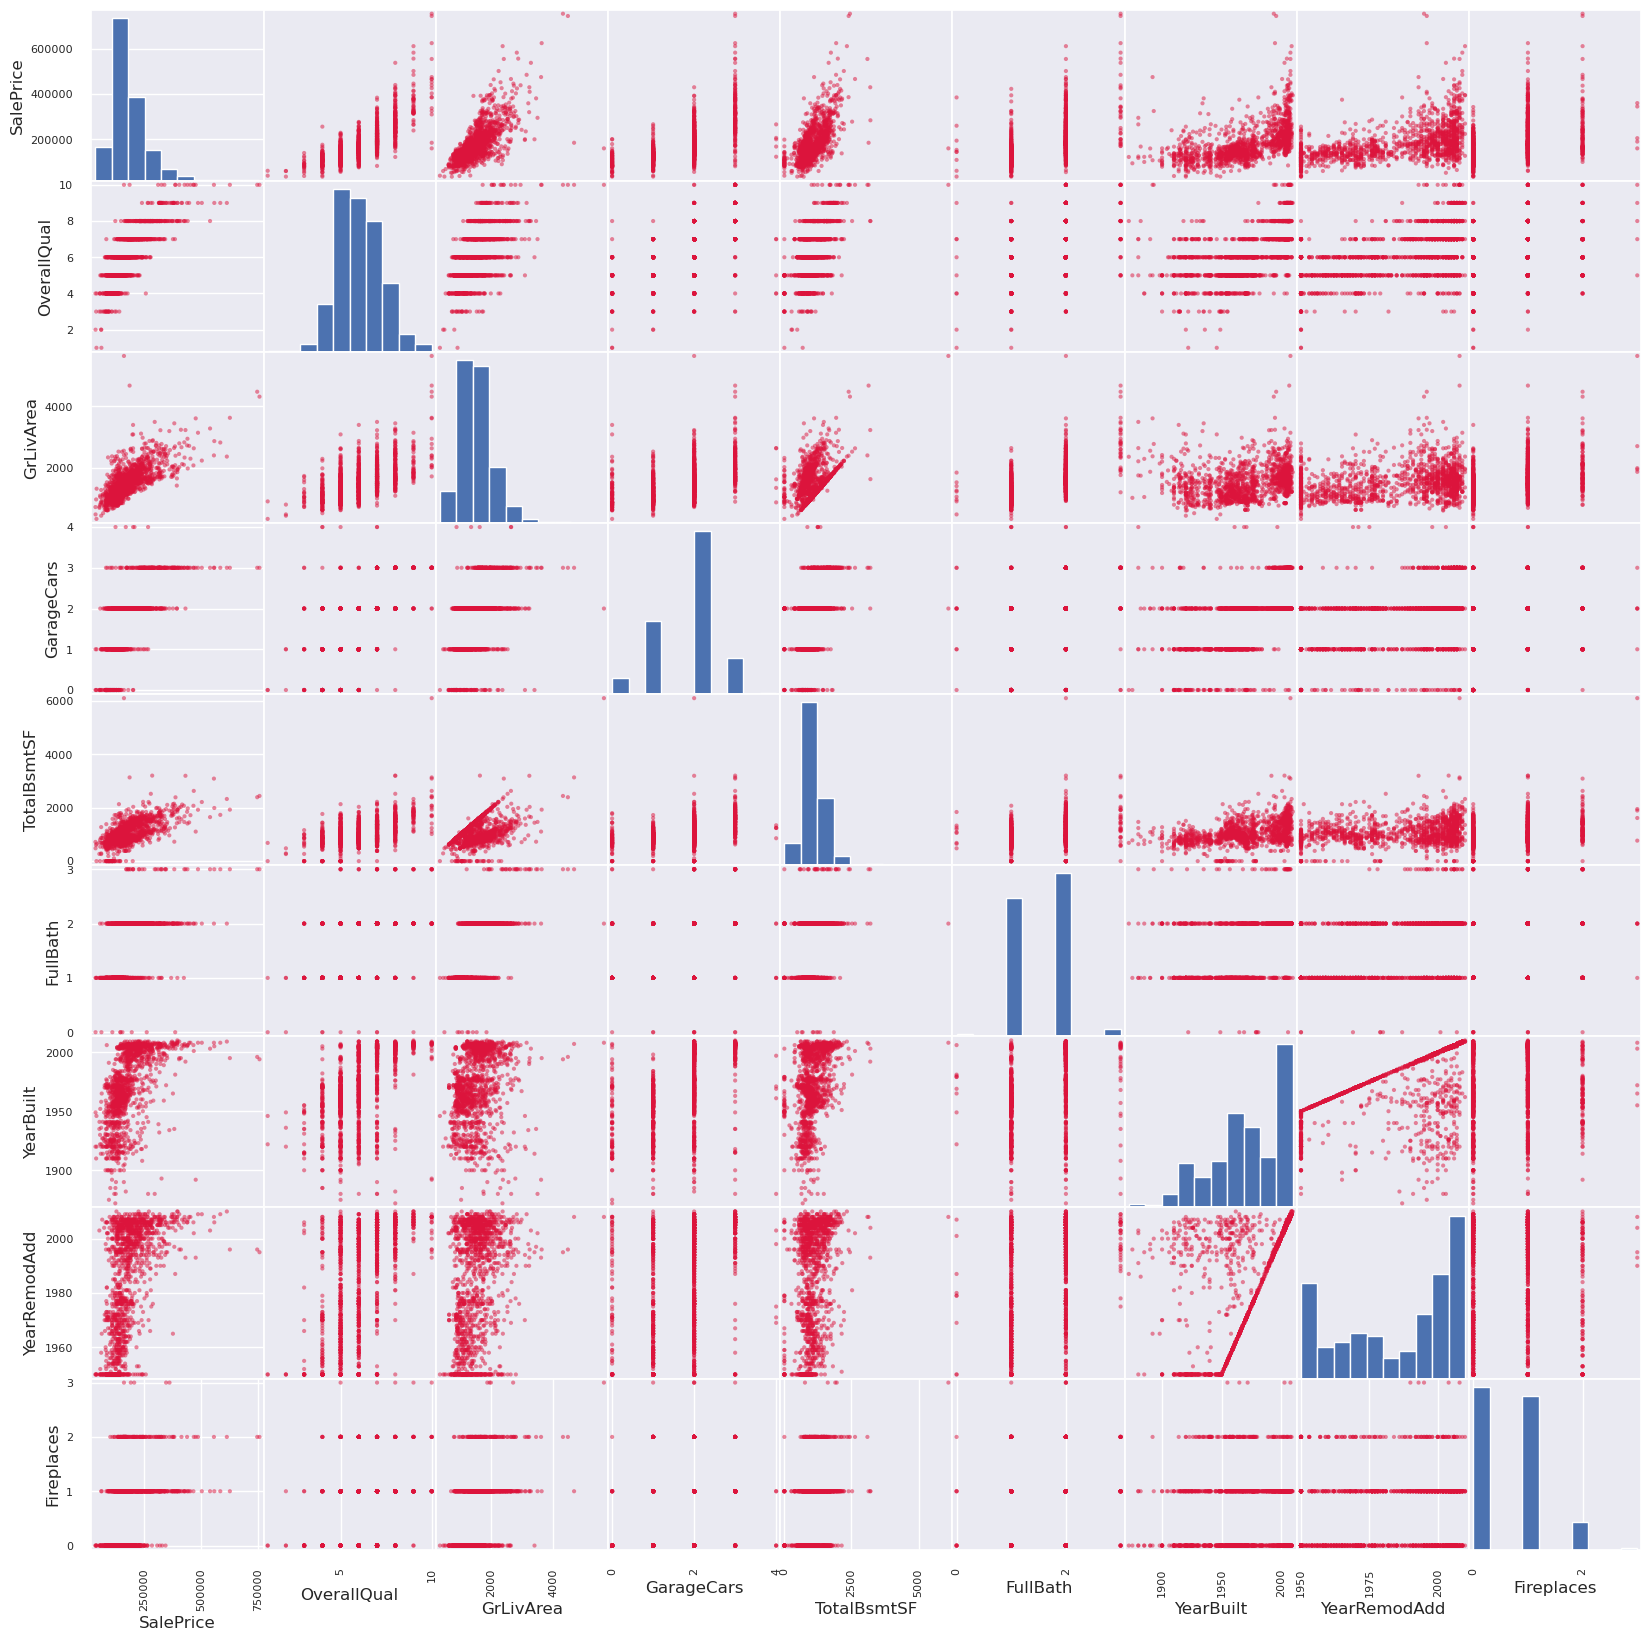

In [30]:
#Plotting a "scatterplot" of some metric variables with high correlation according to the "Spearman Correlation Coefficient"
    #Defining the dataframe (based on "Section 3.1. Conclusions")
training_dataX2 = training_dataX[["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt", "YearRemodAdd", "Fireplaces"]]
scatter_matrix (training_dataX2, figsize = (20,20),color= "Crimson")

## __4.1. Conclusions__

__The assessment of the previous outputs allows us to describe the following__:

1. There are numerous non-linear relationships between the independent metric variables and the dependent metric variable (i.e. "SalePrice"); therefore, could be useful:

> To transform some "independent metric features" of the training set by adding a polynomial of each variable in the training set as a new feature.

# __5. Separating the Data - Training Dataset__

In [48]:
#Making a copy of the original training dataset.
training_data2 = training_data.copy()

#Metric Features
    #Making a copy of the training dataset generated in the section "4. Visualize the Data - Training Dataset"
training_data_metric = training_dataX2.copy()
    #Separating some "features" from the "labels" (also called "target value") of the training dataset
        #Because we do not want to apply the same transformations to the "target values" and "features"
        #Dataframe with only some "features" of the training dataset
training_data_metric = training_data_metric.drop("SalePrice", axis=1)
    #Extracting only the headers of some metric features from the original training dataset.
training_data_metric_header = training_data_metric.columns.values.tolist()

#Nonmetric Features
    #Extracting the nonmetric features from the original training dataset.
training_data_nonmetric = training_data.select_dtypes(include=["object"])
    #Extracting only the headers of the nonmetric features from the original training dataset.
training_data_nonmetric_header = training_data_nonmetric.columns.values.tolist()

# __6. Transformation Pipelines__

## __6.1 Training Dataset (only certain metric features + nonmetric features)__

In [55]:
#Defining the data that is going to used in the pipeline
    #"training_data_metric" was the output from section "5. Separating the Data - Training Dataset"
    #"training_data_nonmetric_header" was the output from section "5. Separating the Data - Training Dataset"
        #Header of the training_data_metric dataframe
training_data_metric_header
        #Header of the training_data_metric dataframe
training_data_nonmetric_header

#Defining the metric pipeline
    #The pair ("name","estimator"("hyperparameter")  are defined for every transformation.     
metric_pipeline = Pipeline([("imputer", SimpleImputer(strategy = "median")),("scaler", StandardScaler())])

#Defining the general pipeline
    #The triplet ("name","estimator","data")  are defined for every transformation. 
full_pipeline = ColumnTransformer([
    ("metric",metric_pipeline,training_data_metric_header),
    ("nonmetric",OneHotEncoder(),training_data_nonmetric_header)    
])

#Applying the transformation through the general pipeline
training_model_1 = full_pipeline.fit_transform(training_data2)

#Printing the "Array of certain metric + nonmetric variables (transformed by pipeline)" (just to check!)
print("\n", '\033[1m','\033[94m',"Array of certain metric + nonmetric variables (transformed by pipeline)",'\033[0m', "\n")
print(training_model_1)

#Printing the "Type of the Array of certain metric + nonmetric variables (transformed by pipeline)" (just to check!)
    #If we are working in the "general pipeline" with the code "OneHotEncoder" and a...
    #..."metric_pipeline", it means that we are working with a mix of outputs such as "sparse matrix"...
    #...due to "OneHotEncoder" and a "dense matrix" due to "metric_pipeline" code.
    
    #The definitive output of our "general pipeline" considering the previous mix will depends on the...
    #..."density of the final output matrix" of the "general pipeline". For instance:
        #1. A CSR(Compressed Sparse Row): is a type of Scipy sparse matrix ("sparse matrix") that will be...
        #...the answer of the "general pipeline" if the ratio of nonzero cells (i.e., the "density" is...
        #...lower than 0.3, also described in the code arguments as "sparse_threshold = 0.3").
        
        #2. A dense matrix: is a type of matrix that will be the answer of the "general pipeline" if the...
        #...ratio of nonzero cells (i.e., the "density" is greater than 0.3, also described in the code...
        #...arguments as "sparse_threshold = 0.3"). 
print("\n", '\033[1m','\033[94m',"Datatype of the Array of certain metric + nonmetric variables (transformed by pipeline)",'\033[0m', "\n")
print(type(training_model_1))

#Printing the "Shape of the Array of certain metric + nonmetric variables (transformed by pipeline)" (just to check!)
print("\n", '\033[1m','\033[94m',"Shape of Array of certain metric + nonmetric variables (transformed by pipeline)",'\033[0m', "\n")
print(training_model_1.shape)

print("\n", '\033[1m','\033[94m',"Dense Numpy Array of certain metric + nonmetric variables (transformed by pipeline)",'\033[0m', "\n")
xxxx = training_model_1.toarray()
print(xxxx)

#Printing the "Datatype of the Transformed Training Dataset for handling categorical attributes" (just to check!)
print("\n", '\033[1m','\033[94m',"Datatype of the Dense Numpy Array of the feature sex (after handling categorical attributes)",'\033[0m', "\n")
print(type(xxxx))
print(xxxx.shape)


   Array of certain numerical + categorical feature (transformed by full pipeline)  

  (0, 0)	0.6514792433257054
  (0, 1)	0.3703334392167798
  (0, 2)	0.31172464418307205
  (0, 3)	-0.4593025408311876
  (0, 4)	0.7897405221108432
  (0, 5)	1.0509937888999856
  (0, 6)	0.8786680880058696
  (0, 7)	-0.9512264882332893
  (0, 11)	1.0
  (0, 14)	1.0
  (0, 17)	1.0
  (0, 21)	1.0
  (0, 25)	1.0
  (0, 26)	1.0
  (0, 32)	1.0
  (0, 33)	1.0
  (0, 41)	1.0
  (0, 63)	1.0
  (0, 72)	1.0
  (0, 78)	1.0
  (0, 88)	1.0
  (0, 92)	1.0
  (0, 98)	1.0
  (0, 117)	1.0
  (0, 133)	1.0
  :	:
  (1459, 143)	1.0
  (1459, 149)	1.0
  (1459, 151)	1.0
  (1459, 159)	1.0
  (1459, 164)	1.0
  (1459, 169)	1.0
  (1459, 172)	1.0
  (1459, 181)	1.0
  (1459, 186)	1.0
  (1459, 193)	1.0
  (1459, 197)	1.0
  (1459, 202)	1.0
  (1459, 207)	1.0
  (1459, 214)	1.0
  (1459, 220)	1.0
  (1459, 222)	1.0
  (1459, 228)	1.0
  (1459, 236)	1.0
  (1459, 242)	1.0
  (1459, 246)	1.0
  (1459, 250)	1.0
  (1459, 255)	1.0
  (1459, 260)	1.0
  (1459, 269)	1.0
  (1459,

# __7. Training and Evaluation of the Model - Training Dataset (only certain metric features)__

## __7.1. Adjusting the Training Dataset__

In [33]:
#Array of certain metric features (transformed by the pipeline)
    #Then we transform this array (generated by the pipeline) into a dataframe 
x_training = pd.DataFrame(num_pipeline_transformation)

print("\n", '\033[1m','\033[94m',"Shape of Dataframe of certain metric features (transformed by the pipeline)",'\033[0m', "\n")
print(x_training.shape)

#Dataframe of the feature "SalePrice" (i.e., the "target value" of the training set)
y_training = (training_data["SalePrice"])

print("\n", '\033[1m','\033[94m',"Shape of Dataframe of target value (training set)",'\033[0m', "\n")
print(y_training.shape)


   Shape of Dataframe of certain metric features (transformed by the pipeline)  

(1460, 8)

   Shape of Dataframe of target value (training set)  

(1460,)


## __7.2. Applying Learning Curves__

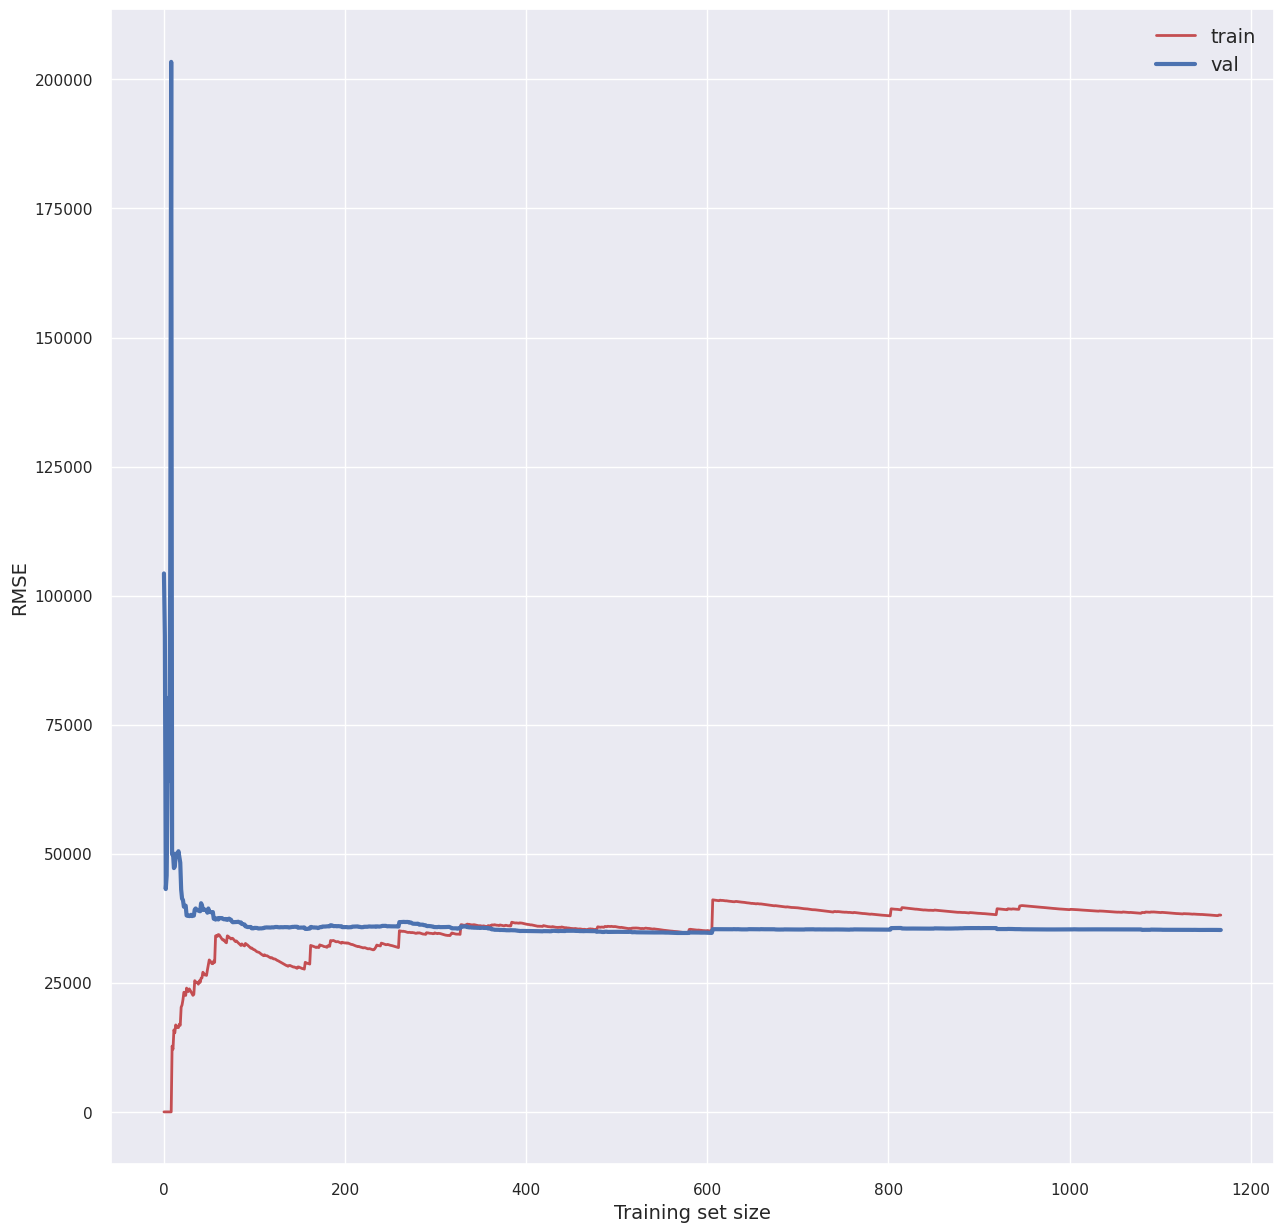

In [34]:
def plot_learning_curves(model, x_training, y_training):
    X_train, X_val, y_train, y_val = train_test_split(x_training, y_training, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x_training, y_training)
plt.show()            

## <span style="color:red"> __THIS IS AN UNFINISHED NOTEBOOK! - I AM STILL WORKING ON IT__</span>


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate some random data
np.random.seed(0)
X = np.random.normal(size=100)
Y = 3 * X + np.random.normal(size=100)

# Fit a linear regression model
model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()

# Get the studentized residuals
student_res = results.outlier_test()['student_res']

# Plot the studentized residuals against the fitted values
plt.scatter(results.fittedvalues, student_res)
plt.xlabel('Fitted values')
plt.ylabel('Studentized residuals')
plt.title('Studentized Residual Plot')
plt.show()

#############################

# Import the libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Define the degree of the polynomial
degree = 2

# Create the polynomial features
poly = PolynomialFeatures(degree)
X = poly.fit_transform(training_dataX['x'].values.reshape(-1, 1))

# Fit the linear regression model
reg = LinearRegression()
reg.fit(X, df['y'])

# Predict the values of y
y_pred = reg.predict(X)

# Compute the standard error of the regression coefficients
n = len(training_dataX) # sample size
p = degree + 1 # number of parameters
se = np.sqrt(np.diag(np.linalg.inv(X.T @ X) * mean_squared_error(df['y'], y_pred)))
print(f'Standard error: {se}')

# Compute the residual standard error
rss = np.sum((training_dataX['y'] - y_pred) ** 2) # residual sum of squares
rse = np.sqrt(rss / (n - p)) # residual standard error
print(f'Residual standard error: {rse}')

# Compute the null and alternative hypotheses
# The null hypothesis is that all the regression coefficients are zero, except the intercept
# The alternative hypothesis is that at least one of the regression coefficients is not zero
H0 = f'H0: beta_1 = beta_2 = ... = beta_{degree} = 0'
H1 = f'H1: beta_i != 0 for some i in {{1, 2, ..., {degree}}}'
print(f'Null hypothesis: {H0}')
print(f'Alternative hypothesis: {H1}')

# Compute the t-statistics and p-values for each coefficient
from scipy.stats import t

t_stat = reg.coef_ / se # t-statistics
p_val = 2 * (1 - t.cdf(np.abs(t_stat), n - p)) # p-values

print(f't-statistics: {t_stat}')
print(f'p-values: {p_val}')

# Compute the R-squared and adjusted R-squared
r2 = r2_score(df['y'], y_pred) # R-squared
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p) # adjusted R-squared

print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

#################

# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.inspection import plot_linear_model_residuals

# Generate some random data
np.random.seed(0)
X = np.random.normal(size=100).reshape(-1, 1)
Y = 3 * X + np.random.normal(size=100).reshape(-1, 1)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, Y)

# Plot the residuals of the linear model
plot_linear_model_residuals(model, X, Y)
plt.show()

############## work

# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot

# Generate some random data with 3 independent variables and 1 response variable
np.random.seed(42)
N = 100 # number of samples
X = np.random.randn(N, 3) # independent variables
y = np.random.randn(N) # response variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

# Transform the independent variables into polynomial terms of degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a multiple polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Create a residuals plot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train_poly, y_train) # fit the training data
visualizer.score(X_test_poly, y_test) # evaluate on the test data
visualizer.show() # show the plot

# Identify outliers based on the residuals plot
# Outliers are points that have large absolute residuals or are far from the fitted line
outliers = np.where(np.abs(visualizer.residuals_) > 2)[0] # get the indices of outliers
print(f"There are {len(outliers)} outliers in the data:")
print(df.iloc[outliers]) # print the outliers
